### Experiment

In [2]:
import json

from IPython.display import display
import algorithmx
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

from utils.utils_go import *
""" import a_format_go as fm
import b_prepro_go as pp
import cd_node_edge_go as ne
import e_change_go as ch
import f_biocyc_go as bc """

' import a_format_go as fm\nimport b_prepro_go as pp\nimport cd_node_edge_go as ne\nimport e_change_go as ch\nimport f_biocyc_go as bc '

In [48]:
# %run a_format_go.py
# %run b_prepro_go.py
# %run c-d_node-edge_go.py
# %run e_change_go.py
# %run f_biocyc_go.py

In [49]:
# %run experiments.py

### Summary

In [3]:
# file = open("exp.json")
# experiment = json.load(file)

exp = "exp1"

#### Preprocessing

In [4]:
df_preprocessing = pd.read_csv("output/{}/preprocessing/graphs_data/summary.csv".format(exp))
df_preprocessing

,Group,Subgroup,Num. nodes,Num. edges,Density
0,pck1,str,360,20769,0.321402
1,zwf1,str,240,14074,0.490725
2,WT,str,600,34526,0.192131


#### Node-Edge embeddings

In [5]:
df_process = pd.read_csv("output/{}/common_edges/summary.csv".format(exp))
df_process

,Method,Group,Data var.,Num. nodes,Num. edges,Density
0,vgae base,pck1,str,120,6282,0.879832
1,vgae base,zwf1,str,120,6767,0.947759
2,vgae base,WT,str,120,5729,0.802381


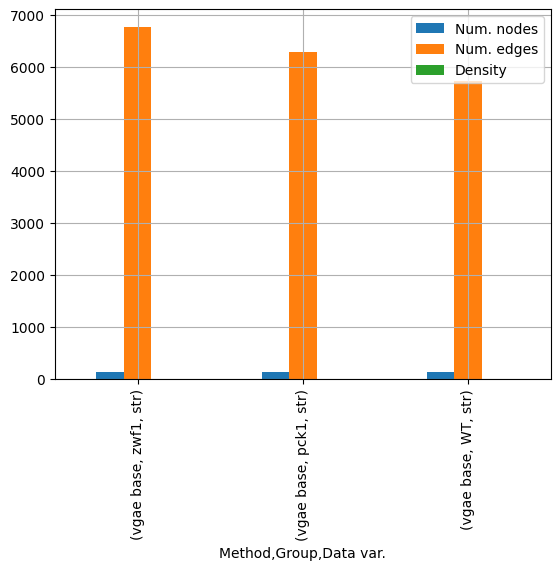

In [6]:
df_comparation_temp = df_process.set_index(["Method", "Group", "Data var."])
df_comparation_temp.sort_values(by=["Method", "Group", "Num. edges"], ascending=False, inplace=True)
ax = df_comparation_temp.plot.bar(rot=90)
ax.grid()

#### Change detection

In [7]:
df_changes = pd.read_csv("output/{}/changes/summary.csv".format(exp))
df_changes

,Method,Group,Data var.,Num. nodes,Num. edges,Density
0,vgae base,WT-pck1,str,120,6968,0.975910
1,vgae base,WT-zwf1,str,120,7067,0.989776


### Queries

In [9]:
print(exp)
file = open("output/{}/parameters.json".format(exp))
params = json.load(file)

exp = params["exp"]
# print("Exp:\t\t", exp)

methods = params["methods"]
print("Methods:\t", methods)

data_variations = params["data_variations"]
print("Data variations:", data_variations)

control = params["control"]
# print("Control:\t", control)

groups_id = params["groups_id"]
# print("Groups id:\t", groups_id)

subgroups_id = params["subgroups_id"]
# print("Subgroups id:\t", subgroups_id)

groups = params["groups"]
# print("Groups:\t\t", groups)

exp1
Methods:	 ['vgae base']
Data variations: ['str']


#### Common subgraph

In [ ]:
edges_count = []
label_x = []
label_y = []

for e in range(1, 19):
    exp = "exp" + str(e)
    for k in range(len(data_variations)):
        label_x = []
        temp = []
        for i in range(len(methods)):
            for j in range(len(groups_id)):
                # print(methods[i], groups_id[j], data_variations[k])
                df_edges_filter_weight_filter = pd.read_csv("output/{}/common_edges/common_edges_{}_{}_{}.csv".format(exp, methods[i], groups_id[j], data_variations[k]))
                df_edges_filter_weight_filter

                G = nx.from_pandas_edgelist(df_edges_filter_weight_filter, source="source", target="target", edge_attr=["weight"], create_using=nx.Graph())
                # graph_partial_detail(G, edges=True)
                SG = G.subgraph([0, 1, 2, 3, 4, 5])
                temp.append(SG.number_of_edges())
                label_x.append("{}-{}".format(methods[i], groups_id[j]))
        
        label_y.append("{}-{}".format(e, data_variations[k]))
        edges_count.append(temp)
    
fig = go.Figure(data=go.Heatmap( 
                   z=np.array(edges_count).T,
                   x=label_y,
                   y=label_x,
                   xgap = 1,
                   ygap = 1,
                   hoverongaps=True))
fig = fig.update_traces(text=np.array(edges_count).T, texttemplate="%{text}", hovertemplate=None)
fig.show()

In [11]:
# form

dict_groups = {}
for group in groups:
    dict_groups["-".join(group)] = group
dict_groups

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

methods = Dropdown(
    options=["vgae", "dgi"],
    value="vgae",
    disabled=False
)
data_variations = Dropdown(
    options=["none", "str", "dyn"],
    value="none",
    disabled=False
)
groups_ = Dropdown(
    options=list(dict_groups.keys()),
    value=list(dict_groups.keys())[0],
    disabled=False
)
views_by = Dropdown(
    options=[("Average Mz", 0), ("Metabolite name", 1)],
    value=0,
    disabled=False
)

form_items = [
    Box([Label(value="Method"), methods], layout=form_item_layout),
    Box([Label(value="Data variation"), data_variations], layout=form_item_layout),
    Box([Label(value="Group"), groups_], layout=form_item_layout),
    Box([Label(value="View by"), views_by], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Method'), Dropdown(options=('vgae', 'dgi'), value='vgae')), layout=La…

#### Change detection

In [23]:
method = methods.value
data_variation = data_variations.value
group = dict_groups[groups_.value]

df_join_raw = pd.read_csv("input/{}_raw.csv".format(exp), index_col=0, usecols=[0, 1, 2])        
# df_join_raw.columns = ["mz", "name"]
df_join_raw

df_change = pd.read_csv("output/{}/changes/changes_edges_log2_{}_{}_{}_{}.csv".format(exp, method, group[0], group[1], data_variation))
# G = nx.from_pandas_edgelist(df_change_filter, edge_attr=["label"], create_using=nx.DiGraph())
df_change

FileNotFoundError: [Errno 2] No such file or directory: 'output/exp2/changes/changes_edges_log2_vgae_WT_pck1_none.csv'

In [10]:
df_change_filter = df_change[df_change["p-value"] < 0.01]
df_change_filter

,source,target,weight1,N1,weight2,N2,label,p-value,significant,source1,target1,source2,target2
2,0,3,0.327888,181,-0.358156,89,pn,5.142395e-08,*,338.9889,360.9713,Unknow,Unknow
3,0,4,0.442063,181,-0.490383,89,pn,1.354472e-14,*,338.9889,505.9889,Unknow,Unknow
5,0,6,-0.012021,181,0.365152,89,np,2.641775e-03,*,338.9889,527.9701,Unknow,Unknow
6,0,8,0.101107,181,-0.294603,89,pn,2.039700e-03,*,338.9889,59.0137,Unknow,Unknow
16,0,19,-0.030958,181,-0.440994,89,nn,7.530335e-04,*,338.9889,113.0246,Unknow,Unknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,10,101,0.011891,181,-0.332082,89,pn,6.549537e-03,*,74.0249,489.9937,Unknow,Unknow
6317,10,111,0.071740,181,-0.309420,89,pn,2.852375e-03,*,74.0249,642.0252,Unknow,Unknow
6328,56,101,-0.368951,181,0.102837,89,np,1.881850e-04,*,171.9842,489.9937,Unknow,Unknow
6358,101,116,-0.292891,181,0.107917,89,np,1.792931e-03,*,489.9937,784.1495,Unknow,Unknow


In [11]:
view_by = views_by.value

G = nx.from_pandas_edgelist(df_change_filter, source="source", target="target", edge_attr=["label"], create_using=nx.DiGraph())
nodes_ = sorted(list(G.nodes()))
df_nodes = df_join_raw.loc[nodes_]
df_nodes
nodes_detail = list(zip(df_nodes.iloc[:, view_by].values, df_nodes.index.to_list()))

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

nodes = widgets.SelectMultiple(
    options=nodes_detail,
    value=[],
    rows=10,
    disabled=False
)

form_items = [
    Box([Label(value="Nodes"), nodes], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Nodes'), SelectMultiple(options=((338.9889, 0), (166.9758, 1), (173.0…

In [12]:
# filter by nodes
view_by = views_by.value

nodes_select = nodes.value
nodes_select

df_nodes_filter = df_nodes.loc[nodes_select,:]
df_nodes_filter

SG = G.subgraph(nodes_select)
# SG = nx.relabel_nodes(SG, id_mz)
edge_labels = nx.get_edge_attributes(SG, "label")

canvas = algorithmx.jupyter_canvas()
canvas.size((600, 600))
canvas.edgelayout("symmetric").edgelength(85)
canvas.label("title").add({"text": "{} --> {}".format(group[0], group[1])})

keys, values = list(df_nodes_filter.index), list(df_nodes_filter.values.tolist())

canvas.nodes(SG.nodes).add({
    "color": "orange",
    "svgattrs": {
        "stroke-width": 2,
        "stroke": "gray"
    }
}).data(values).add(
    size=(16),
    labels=lambda d: {
        0: {"color": "black", "text": d[view_by], "size": 14}
    }
)

# Add directed edges with weight labels
canvas.edges(SG.edges).add({
    "color": "gray",
    "directed": True,
    "thickness": 2}).data(edge_labels.values()).add(
        labels=lambda label: {
            1: {"color": "black", "text": label, "size": 14},
        }
    )
canvas

JupyterWidget(events=['{"attrs": {"size": [600, 600]}}', '{"attrs": {"edgelayout": "symmetric"}}', '{"attrs": …

#### BioCyc

In [114]:
# form

dict_groups = {}
for group in groups:
    dict_groups["-".join(group)] = group
dict_groups

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

exp_ = Text(
    value="",
    placeholder='Type Experiment Code',
    disabled=False   
)

methods = Dropdown(
    options=["vgae", "dgi"],
    value="vgae",
    disabled=False
)
data_variations = Dropdown(
    options=["none", "str", "dyn"],
    value="none",
    disabled=False
)
groups_ = Dropdown(
    options=list(dict_groups.keys()),
    value=list(dict_groups.keys())[0],
    disabled=False
)
threshold_ratio_ = FloatSlider(
    value=0.5,
    min=-1.0,
    max=1.0,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
views_by = Dropdown(
    options=[("Average Mz", 1), ("Metabolite name", 0)],
    value=1,
    disabled=False
)

form_items = [
    Box([Label(value="Experiment code"), exp_], layout=form_item_layout),
    Box([Label(value="Method"), methods], layout=form_item_layout),
    Box([Label(value="Data variation"), data_variations], layout=form_item_layout),
    Box([Label(value="Group"), groups_], layout=form_item_layout),
    Box([Label(value="Threshold ratio"), threshold_ratio_], layout=form_item_layout),
    Box([Label(value="View by"), views_by], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Experiment code'), Text(value='', placeholder='Type Experiment Code')…

In [137]:
exp = exp_.value
method = methods.value
data_variation = data_variations.value
group = dict_groups[groups_.value]
threshold_ratio = threshold_ratio_.value
view_by = views_by.value

In [118]:
df_biocyc = pd.read_csv("output/{}/biocyc/biocyc_{}_{}_{}.csv".format(exp, method, "-".join(group), data_variation), sep="\t")
df_biocyc 

,Metabolite name,Average Mz,Alignment ID,WT,pck1,Ratio
0,Unknow,338.9889,0,4.939533,4.812469,-0.422096
1,Unknow,166.9758,1,3.198233,3.253850,0.184754
2,Unknow,173.0454,2,3.155365,3.234011,0.261257
3,Unknow,360.9713,3,4.454798,4.355585,-0.329576
4,Unknow,505.9889,4,5.312428,5.324922,0.041503
...,...,...,...,...,...,...
115,Unknow,846.0738,119,3.326363,3.317765,-0.028561
116,Unknow,168.0663,52,3.507758,3.406881,-0.335108
117,Unknow,117.0195,21,3.601253,3.855013,0.842971
118,Unknow,830.0995,118,3.330714,3.229719,-0.335498


In [120]:
df_biocyc_filter = df_biocyc[df_biocyc["Ratio"].abs() > threshold_ratio].copy()
df_biocyc_filter.sort_values(by=["Alignment ID"], inplace=True)
df_biocyc_filter

,Metabolite name,Average Mz,Alignment ID,WT,pck1,Ratio
83,Unknow,74.0249,10,3.887328,4.089844,0.672743
9,Unknow,85.0296,11,3.556736,3.375561,-0.601849
11,Unknow,88.0405,13,3.264173,3.437587,0.576067
12,Unknow,89.0245,14,3.799468,3.549381,-0.830771
14,Unknow,102.0562,16,3.410801,3.590801,0.597944
15,Unknow,109.0407,17,3.693186,4.040965,1.155296
17,Unknow,113.0246,19,4.149393,3.924243,-0.747931
117,Unknow,117.0195,21,3.601253,3.855013,0.842971
18,Unknow,118.0510,22,4.961345,5.155159,0.643835
19,Unknow,118.9807,23,4.230968,4.036658,-0.645484


In [136]:
fig = go.Figure(data=go.Heatmap(
    z=df_biocyc_filter.iloc[:, 3:5].T.values,
    y=group,
    x=list(map(str, df_biocyc_filter.iloc[:, view_by].values)),
    hoverongaps=False))
fig.show()

fig = go.Figure(data=go.Heatmap(
    z=df_biocyc_filter.iloc[:, -1:].T.values,
    y=["Ratio"],
    x=list(map(str, df_biocyc_filter.iloc[:, view_by].values)),
    hoverongaps=False))
fig.show()